In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
mpl.rcParams['figure.dpi']= 300

%matplotlib inline  

inst=1
field='SWIRE'
quad='A'

catcoorddir='../doc/20170617_Stacking/maps/catcoord/TM'+str(inst)+'/'

ukdfname = list(pd.read_csv(catcoorddir+'UKIDSS/'+field+'_'+quad+'_uk.txt',header=0,sep='|'))
ukdf_raw = pd.read_csv(catcoorddir+'UKIDSS/'+field+'_'+quad+'_uk.txt',header=0,sep=',',names=ukdfname)

tmdfname = list(pd.read_csv(catcoorddir+'PSC/'+field+'_'+quad+'_2m.txt',header=0,sep='|'))
tmdf_raw = pd.read_csv(catcoorddir+'PSC/'+field+'_'+quad+'_2m.txt',header=0,sep=',',names=tmdfname)

fname='TM'+ str(inst) + '_' + field + '_' + quad + '_matched.csv'
df=pd.read_csv(fname)

fname='TM'+ str(inst) + '_' + field + '_' + quad + '_UKmatched.csv'
ukdf=pd.read_csv(fname)

fname='TM'+ str(inst) + '_' + field + '_' + quad + '_2Mmatched.csv'
tmdf=pd.read_csv(fname)


In [10]:
df.head()

,Unnamed: 0,tm_idx,uk_idx,tm_x,uk_x,tm_y,uk_y,dmatch_arcsec,tm_mAB_j,uk_mAB_j,dm_j,tm_mAB_h,tm_mAB_k,uk_mAB_k,dm_k,mergedClass,pstar,pgalaxy,pnoise
0,593,5092,68321,12.298339,12.296283,511.460305,511.469116,0.063334,15.618,15.955,-0.337,15.417,15.502,15.849,-0.347,1,0.003067,0.993865,0.003067
1,600,5110,106991,104.705905,104.739357,511.036652,511.045794,0.241587,17.144,17.409,-0.265,16.928,16.718,16.979,-0.261,1,0.003067,0.993865,0.003067
2,601,5111,84396,180.814640,180.802733,511.473815,511.482616,0.103315,15.730,15.745,-0.015,15.673,16.012,16.034,-0.022,-1,0.993865,0.003067,0.003067
3,604,5119,109676,102.982322,103.014203,509.883068,509.847859,0.331694,17.433,17.712,-0.279,16.879,16.701,17.125,-0.424,1,0.003067,0.993865,0.003067
4,609,5135,64229,33.937444,33.963464,508.036115,507.996552,0.330917,17.827,18.170,-0.343,17.628,17.161,17.687,-0.526,1,0.003067,0.993865,0.003067


In [11]:
df.describe()

,Unnamed: 0,tm_idx,uk_idx,tm_x,uk_x,tm_y,uk_y,dmatch_arcsec,tm_mAB_j,uk_mAB_j,dm_j,tm_mAB_h,tm_mAB_k,uk_mAB_k,dm_k,mergedClass,pstar,pgalaxy,pnoise
count,2259.000000,2259.000000,2259.000000,2259.000000,2259.000000,2259.000000,2259.000000,2259.000000,2259.000000,2259.000000,2259.000000,2259.000000,2259.000000,2259.000000,2259.000000,2259.000000,2259.000000,2259.000000,2259.000000
mean,2235.527667,7944.143869,122326.514387,255.433763,255.434818,248.871659,248.873671,0.266847,16.295153,16.396149,-0.100996,16.220796,16.454973,16.634432,-0.179458,-0.702081,0.828076,0.166591,0.005333
std,953.101287,1625.636785,87507.120947,150.711952,150.712401,149.890910,149.891529,0.421937,1.503152,1.524230,0.291890,1.443229,1.356709,1.375534,0.390217,0.749520,0.363846,0.363002,0.030569
min,593.000000,5092.000000,2005.000000,-0.471624,-0.479566,-0.490062,-0.467015,0.000000,8.940000,10.820000,-4.557000,8.660000,8.905000,11.463000,-6.139000,-2.000000,0.003067,0.003067,0.003067
25%,1406.500000,6547.500000,50908.000000,123.888421,123.891827,116.104649,116.106916,0.097486,15.591000,15.606000,-0.130000,15.528500,15.836000,15.919500,-0.256000,-1.000000,0.993865,0.003067,0.003067
50%,2259.000000,7988.000000,99798.000000,253.429688,253.450330,241.242416,241.242472,0.177591,16.717000,16.773000,-0.031000,16.620000,16.868000,17.003000,-0.098000,-1.000000,0.993865,0.003067,0.003067
75%,3073.500000,9372.500000,192124.000000,388.789382,388.770829,378.367055,378.371541,0.317433,17.408000,17.514000,0.015500,17.268000,17.383000,17.622000,-0.035000,-1.000000,0.993865,0.003067,0.003067
max,3853.000000,10713.000000,453992.000000,511.315910,511.331520,511.473815,511.482616,9.036572,19.523000,22.976000,0.421000,19.228000,19.104000,23.147000,1.162000,1.000000,0.993865,0.993865,0.486486


In [12]:
ukdf.head()

,Unnamed: 0,idx,ra,dec,x,y,mAB_I,mAB_H,mAB_j,mAB_k,mergedClass,pstar,pgalaxy,pnoise,is2m
0,287,320,242.823578,55.695515,35.724938,511.382605,22.058,22.058,22.058,0.0,1,0.05,0.9,0.05,0.0
1,291,325,242.824371,55.695854,35.551384,511.151390,22.142,22.142,22.142,0.0,1,0.05,0.9,0.05,0.0
2,364,409,242.824203,55.696491,35.221305,511.197300,21.899,21.899,21.899,0.0,1,0.05,0.9,0.05,0.0
3,394,442,242.823730,55.698498,34.181798,511.325781,22.134,22.134,22.134,0.0,1,0.05,0.9,0.05,0.0
4,400,450,242.823364,55.698837,34.005146,511.430385,22.306,22.306,22.306,0.0,1,0.05,0.9,0.05,0.0


In [13]:
ukdf.describe()

,Unnamed: 0,idx,ra,dec,x,y,mAB_I,mAB_H,mAB_j,mAB_k,mergedClass,pstar,pgalaxy,pnoise,is2m
count,107923.000000,107923.000000,107923.000000,107923.000000,107923.000000,107923.000000,107923.000000,107923.000000,107923.000000,107923.000000,107923.000000,107923.000000,107923.000000,107923.000000,107923.000000
mean,77155.336453,121905.172558,243.671390,55.265776,257.776518,264.237872,21.737913,21.446712,19.158548,17.050290,0.253903,0.271732,0.705301,0.022966,0.021108
std,44101.633410,84940.016606,0.486659,0.285444,147.339662,143.186070,1.465172,1.458770,7.132562,8.416046,1.117744,0.391119,0.396220,0.043473,0.143744
min,287.000000,320.000000,242.822174,54.770199,-0.499583,-0.477367,10.820000,11.463000,0.000000,0.000000,-3.000000,0.003067,0.003067,0.003067,0.000000
25%,40477.500000,52542.500000,243.278038,55.020441,127.812903,138.006589,21.196000,20.733000,20.391000,18.919000,-1.000000,0.003067,0.486486,0.003067,0.000000
50%,73662.000000,103258.000000,243.591003,55.253197,264.318571,288.210846,22.129000,21.762000,21.889000,21.043000,1.000000,0.050000,0.900000,0.003067,0.000000
75%,113013.500000,177261.500000,244.100876,55.517614,384.540237,380.061094,22.700000,22.452000,22.676000,21.975000,1.000000,0.486486,0.993865,0.050000,0.000000
max,173261.000000,454118.000000,244.583145,55.767021,511.497363,511.498750,26.833000,25.510000,26.833000,25.510000,1.000000,0.993865,0.993865,0.486486,1.000000


In [14]:
idxstr=np.arange(len(df))[df.mergedClass == -1]
idxgal=np.arange(len(df))[df.mergedClass == 1]
idxn=np.arange(len(df))[df.mergedClass == 0]
idxpstr=np.arange(len(df))[df.mergedClass == -2]
idxpgal=np.arange(len(df))[df.mergedClass == -3]
idxsat=np.arange(len(df))[df.mergedClass == -9]

print('# str=%d, # gal=%d, # n=%d, # prob str=%d, # prob gal=%d, # sat= %d'\
     %(len(idxstr),len(idxgal),len(idxn),len(idxpstr),len(idxpgal),len(idxsat)))

# str=1861, # gal=357, # n=0, # prob str=41, # prob gal=0, # sat= 0


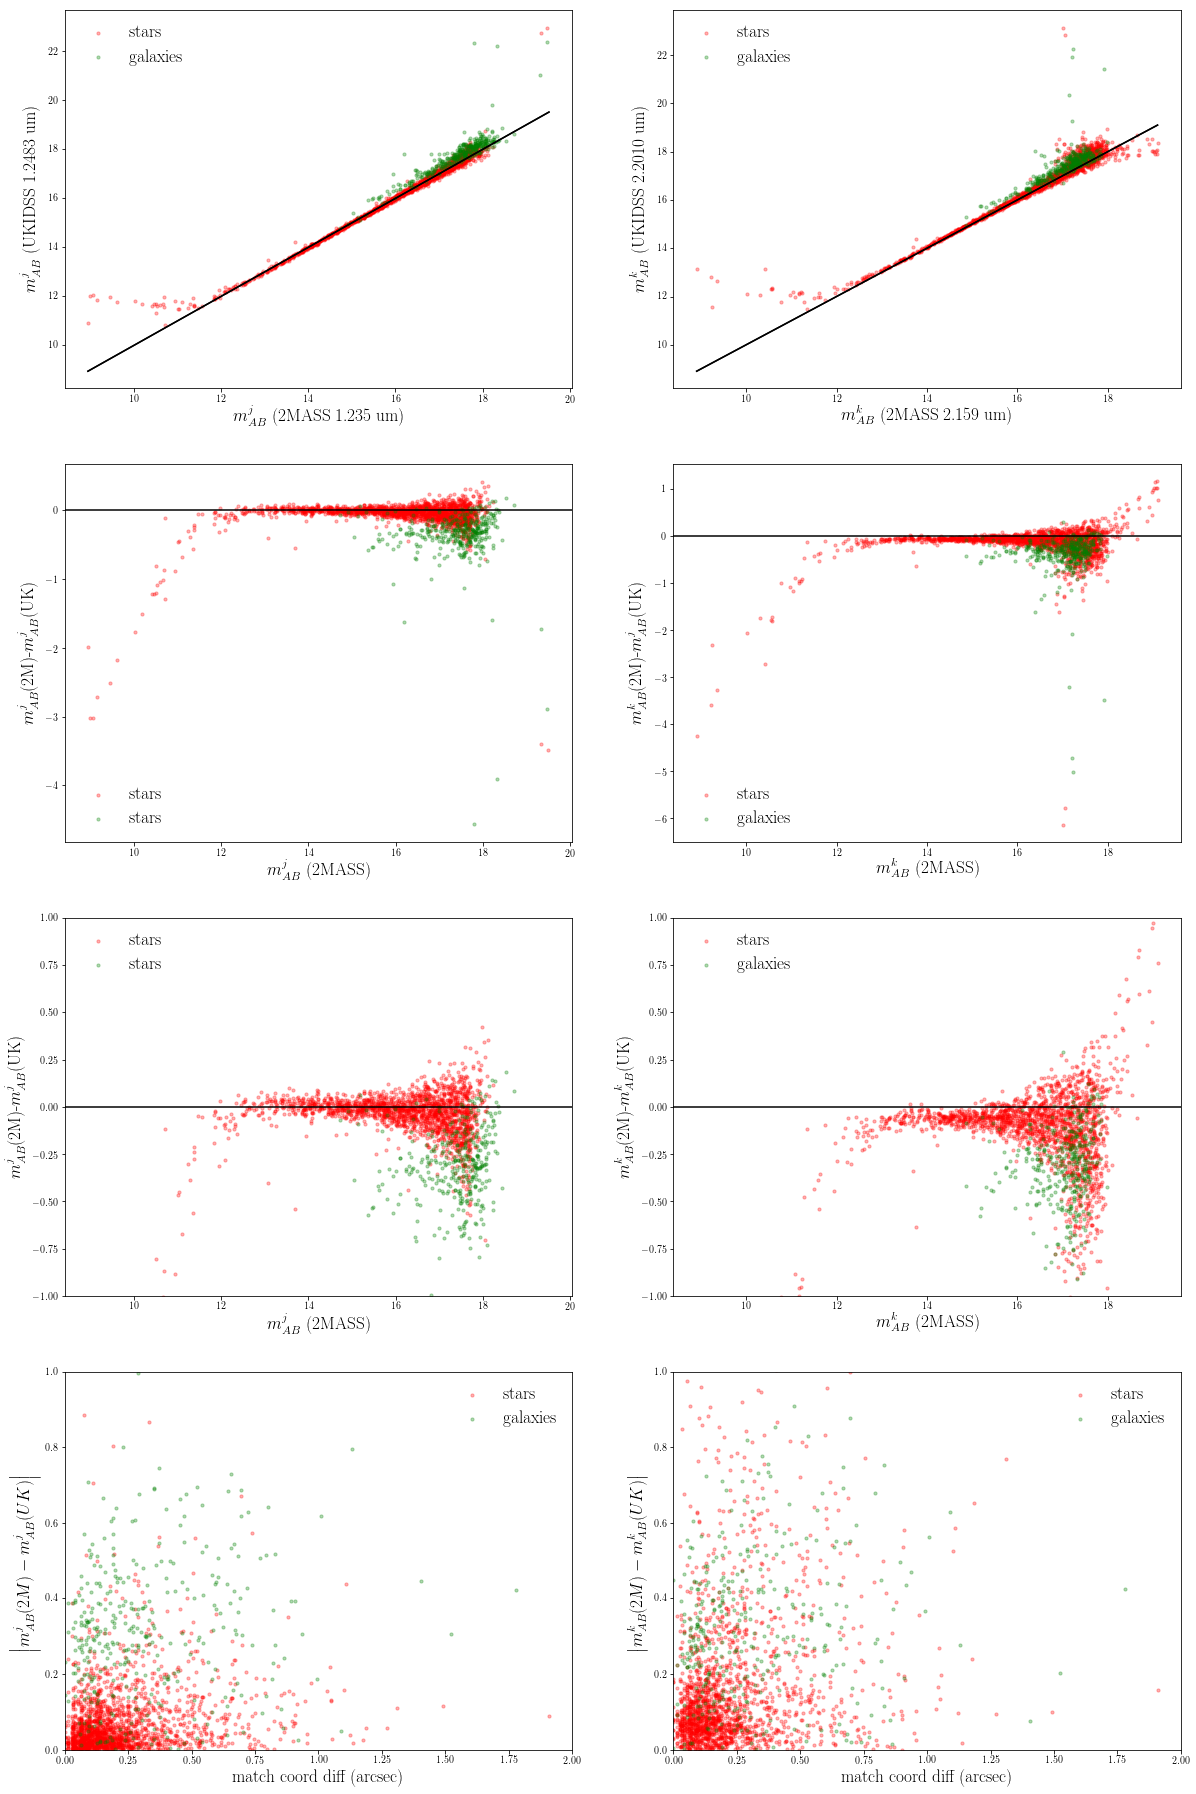

In [15]:
fig=plt.figure(figsize=[20,32])
ax1 = fig.add_subplot(421)
ax2 = fig.add_subplot(422)
ax3 = fig.add_subplot(423)
ax4 = fig.add_subplot(424)
ax5 = fig.add_subplot(425)
ax6 = fig.add_subplot(426)
ax7 = fig.add_subplot(427)
ax8 = fig.add_subplot(428)


ax1.scatter(df.tm_mAB_j[idxstr],df.uk_mAB_j[idxstr],c='r',s=10,alpha=0.3,label='stars')
ax1.scatter(df.tm_mAB_j[idxgal],df.uk_mAB_j[idxgal],c='g',s=10,alpha=0.3,label='galaxies')
ax1.plot([min(df.tm_mAB_j),max(df.tm_mAB_j)],[min(df.tm_mAB_j),max(df.tm_mAB_j)],'k')
ax1.plot([min(df.tm_mAB_j),max(df.tm_mAB_j)],[min(df.tm_mAB_j),max(df.tm_mAB_j)],'k')
ax1.set_xlabel(r'$m_{AB}^j$ (2MASS 1.235 um)',fontsize='xx-large')
ax1.set_ylabel(r'$m_{AB}^j$ (UKIDSS 1.2483 um)',fontsize='xx-large')
ax1.legend(loc=2,frameon=False,fontsize='xx-large')

ax2.scatter(df.tm_mAB_k[idxstr],df.uk_mAB_k[idxstr],c='r',s=10,alpha=0.3,label='stars')
ax2.scatter(df.tm_mAB_k[idxgal],df.uk_mAB_k[idxgal],c='g',s=10,alpha=0.3,label='galaxies')
ax2.plot([min(df.tm_mAB_k),max(df.tm_mAB_k)],[min(df.tm_mAB_k),max(df.tm_mAB_k)],'k')
ax2.plot([min(df.tm_mAB_k),max(df.tm_mAB_k)],[min(df.tm_mAB_k),max(df.tm_mAB_k)],'k')
ax2.set_xlabel(r'$m_{AB}^k$ (2MASS 2.159 um)',fontsize='xx-large')
ax2.set_ylabel(r'$m_{AB}^k$ (UKIDSS 2.2010 um)',fontsize='xx-large')
ax2.legend(loc=2,frameon=False,fontsize='xx-large')

ax3.scatter(df.tm_mAB_j[idxstr],df.dm_j[idxstr],c='r',s=10,alpha=0.3,label='stars')
ax3.scatter(df.tm_mAB_j[idxgal],df.dm_j[idxgal],c='g',s=10,alpha=0.3,label='stars')
ax3.axhline(0,c='k')
ax3.set_xlabel(r'$m_{AB}^j$ (2MASS)',fontsize='xx-large')
ax3.set_ylabel(r'$m_{AB}^j$(2M)-$m_{AB}^j$(UK)',fontsize='xx-large')
ax3.legend(loc=3,frameon=False,fontsize='xx-large')

ax4.scatter(df.tm_mAB_k[idxstr],df.dm_k[idxstr],c='r',s=10,alpha=0.3,label='stars')
ax4.scatter(df.tm_mAB_k[idxgal],df.dm_k[idxgal],c='g',s=10,alpha=0.3,label='galaxies')
ax4.axhline(0,c='k')
ax4.set_xlabel(r'$m_{AB}^k$ (2MASS)',fontsize='xx-large')
ax4.set_ylabel(r'$m_{AB}^k$(2M)-$m_{AB}^j$(UK)',fontsize='xx-large')
ax4.legend(loc=3,frameon=False,fontsize='xx-large')

ax5.scatter(df.tm_mAB_j[idxstr],df.dm_j[idxstr],c='r',s=10,alpha=0.3,label='stars')
ax5.scatter(df.tm_mAB_j[idxgal],df.dm_j[idxgal],c='g',s=10,alpha=0.3,label='stars')
ax5.axhline(0,c='k')
ax5.set_ylim([-1,1])
ax5.set_xlabel(r'$m_{AB}^j$ (2MASS)',fontsize='xx-large')
ax5.set_ylabel(r'$m_{AB}^j$(2M)-$m_{AB}^j$(UK)',fontsize='xx-large')
ax5.legend(loc=2,frameon=False,fontsize='xx-large')

ax6.scatter(df.tm_mAB_k[idxstr],df.dm_k[idxstr],c='r',s=10,alpha=0.3,label='stars')
ax6.scatter(df.tm_mAB_k[idxgal],df.dm_k[idxgal],c='g',s=10,alpha=0.3,label='galaxies')
ax6.axhline(0,c='k')
ax6.set_ylim([-1,1])
ax6.set_xlabel(r'$m_{AB}^k$ (2MASS)',fontsize='xx-large')
ax6.set_ylabel(r'$m_{AB}^k$(2M)-$m_{AB}^k$(UK)',fontsize='xx-large')
ax6.legend(loc=2,frameon=False,fontsize='xx-large')

ax7.scatter(df.dmatch_arcsec[idxstr],abs(df.dm_j[idxstr]),c='r',s=10,alpha=0.3,label='stars')
ax7.scatter(df.dmatch_arcsec[idxgal],abs(df.dm_j[idxgal]),c='g',s=10,alpha=0.3,label='galaxies')
ax7.set_xlim([0,2])
ax7.set_ylim([0,1])
ax7.set_xlabel('match coord diff (arcsec)',fontsize='xx-large')
ax7.set_ylabel(r'$\left | m_{AB}^j(2M)-m_{AB}^j(UK) \right |$',fontsize='xx-large')
ax7.legend(loc=1,frameon=False,fontsize='xx-large')

ax8.scatter(df.dmatch_arcsec[idxstr],abs(df.dm_k[idxstr]),c='r',s=10,alpha=0.3,label='stars')
ax8.scatter(df.dmatch_arcsec[idxgal],abs(df.dm_k[idxgal]),c='g',s=10,alpha=0.3,label='galaxies')
ax8.set_xlim([0,2])
ax8.set_ylim([0,1])
ax8.set_xlabel('match coord diff (arcsec)',fontsize='xx-large')
ax8.set_ylabel(r'$\left | m_{AB}^k(2M)-m_{AB}^k(UK) \right |$',fontsize='xx-large')
ax8.legend(loc=1,frameon=False,fontsize='xx-large')

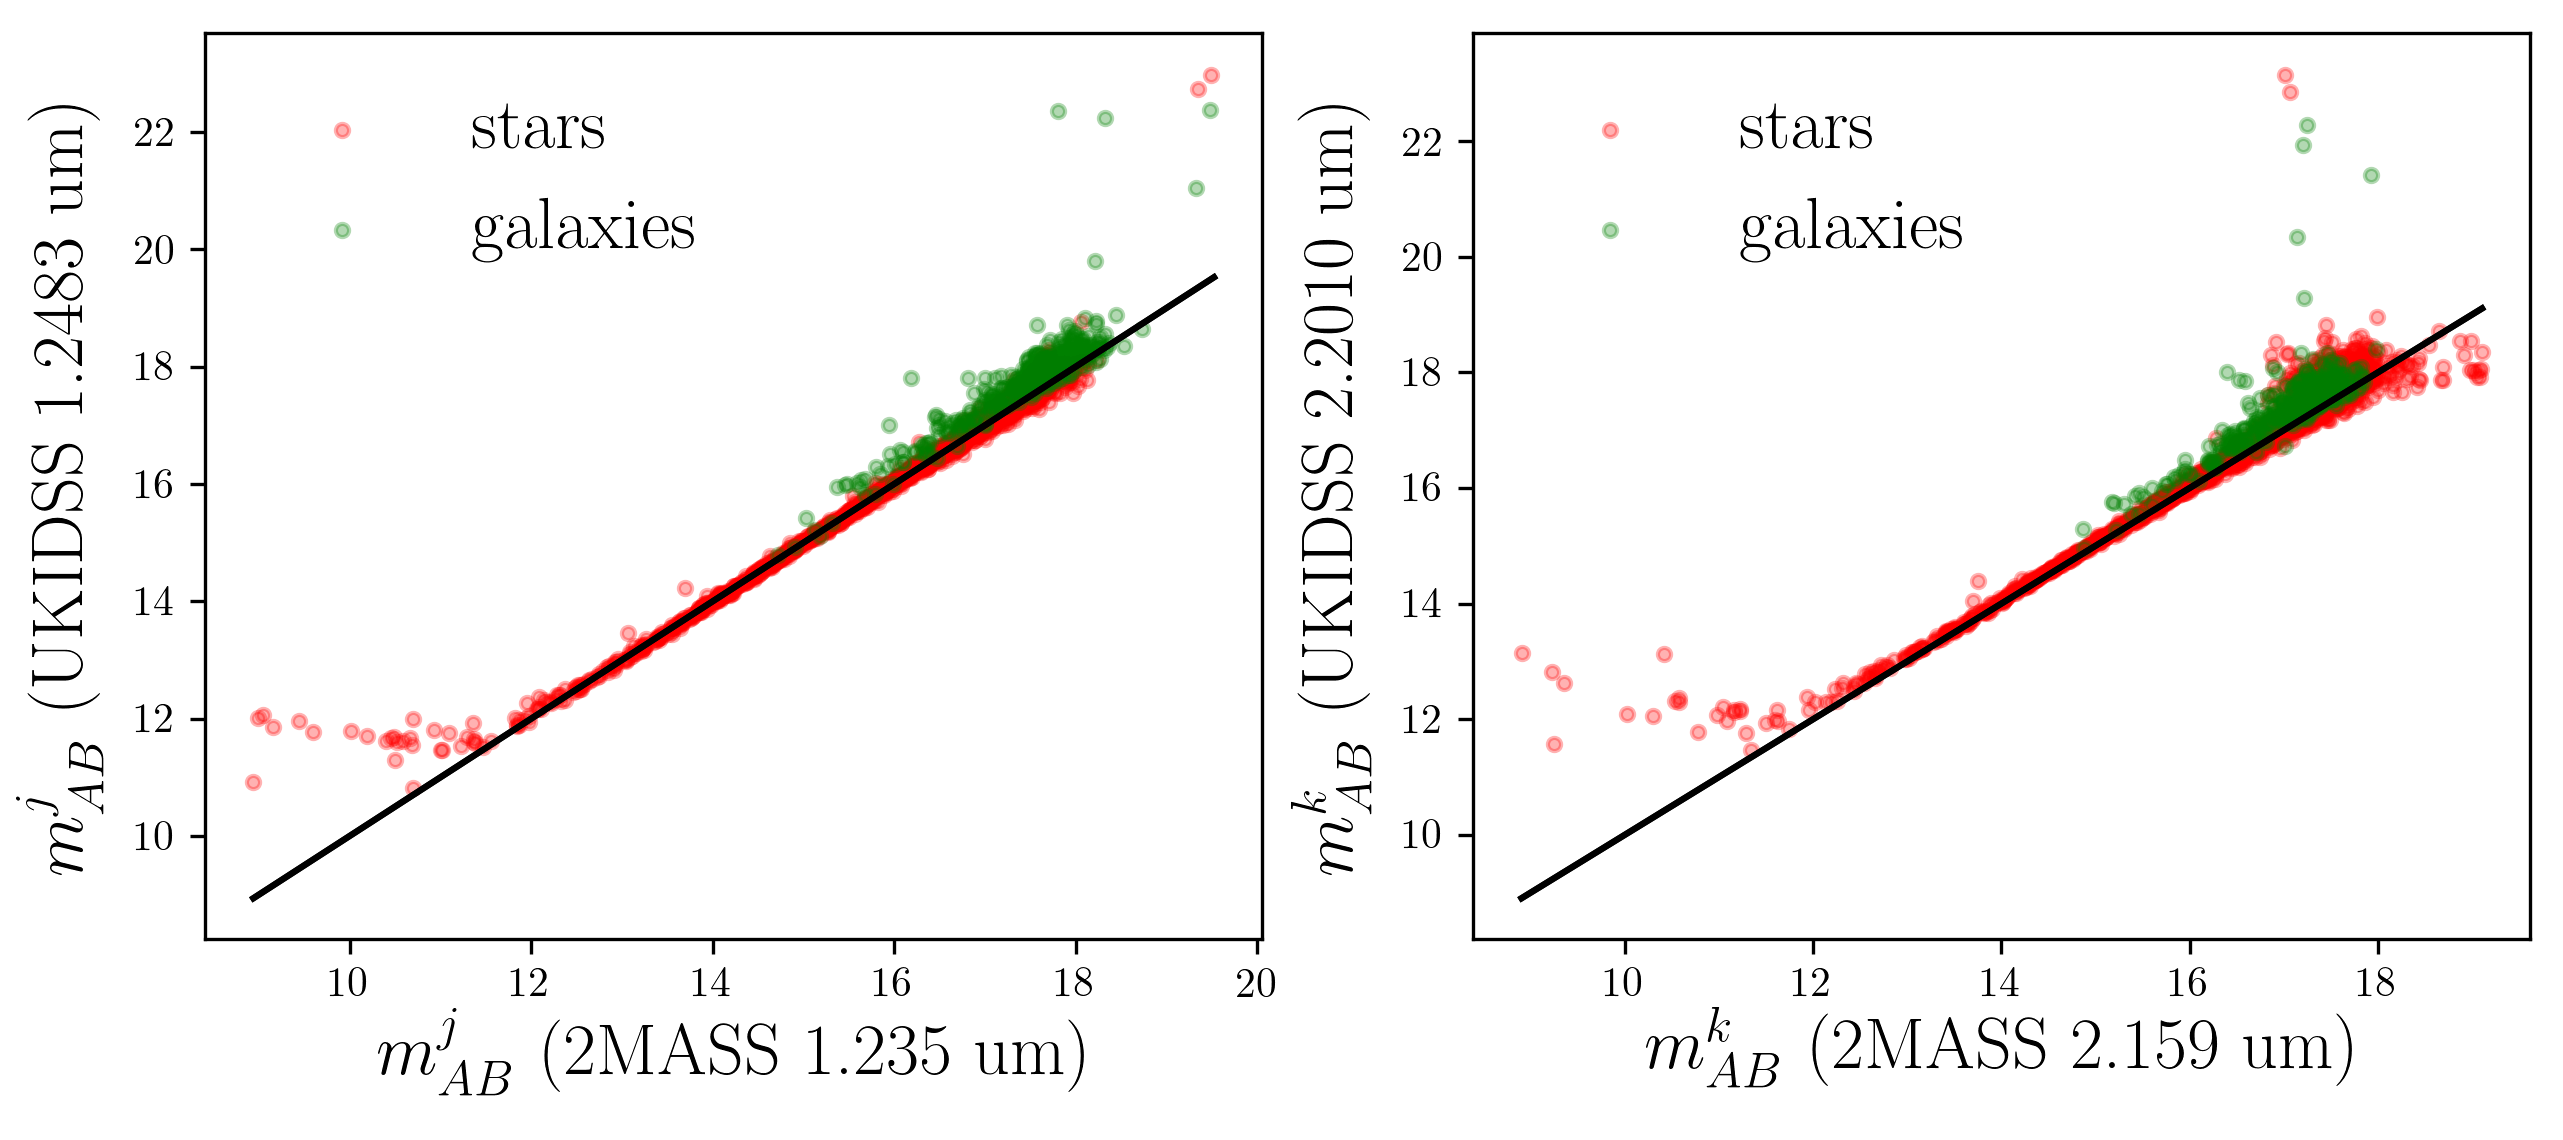

In [16]:
mpl.rcParams['figure.dpi']= 300
fig=plt.figure(figsize=[10,4])
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.scatter(df.tm_mAB_j[idxstr],df.uk_mAB_j[idxstr],c='r',s=10,alpha=0.3,label='stars')
ax1.scatter(df.tm_mAB_j[idxgal],df.uk_mAB_j[idxgal],c='g',s=10,alpha=0.3,label='galaxies')
ax1.plot([min(df.tm_mAB_j),max(df.tm_mAB_j)],[min(df.tm_mAB_j),max(df.tm_mAB_j)],'k')
ax1.plot([min(df.tm_mAB_j),max(df.tm_mAB_j)],[min(df.tm_mAB_j),max(df.tm_mAB_j)],'k')
ax1.set_xlabel(r'$m_{AB}^j$ (2MASS 1.235 um)',fontsize='xx-large')
ax1.set_ylabel(r'$m_{AB}^j$ (UKIDSS 1.2483 um)',fontsize='xx-large')
ax1.legend(loc=2,frameon=False,fontsize='xx-large')

ax2.scatter(df.tm_mAB_k[idxstr],df.uk_mAB_k[idxstr],c='r',s=10,alpha=0.3,label='stars')
ax2.scatter(df.tm_mAB_k[idxgal],df.uk_mAB_k[idxgal],c='g',s=10,alpha=0.3,label='galaxies')
ax2.plot([min(df.tm_mAB_k),max(df.tm_mAB_k)],[min(df.tm_mAB_k),max(df.tm_mAB_k)],'k')
ax2.plot([min(df.tm_mAB_k),max(df.tm_mAB_k)],[min(df.tm_mAB_k),max(df.tm_mAB_k)],'k')
ax2.set_xlabel(r'$m_{AB}^k$ (2MASS 2.159 um)',fontsize='xx-large')
ax2.set_ylabel(r'$m_{AB}^k$ (UKIDSS 2.2010 um)',fontsize='xx-large')
ax2.legend(loc=2,frameon=False,fontsize='xx-large')

plt.savefig('mag_corr.png',bbox_inches='tight')

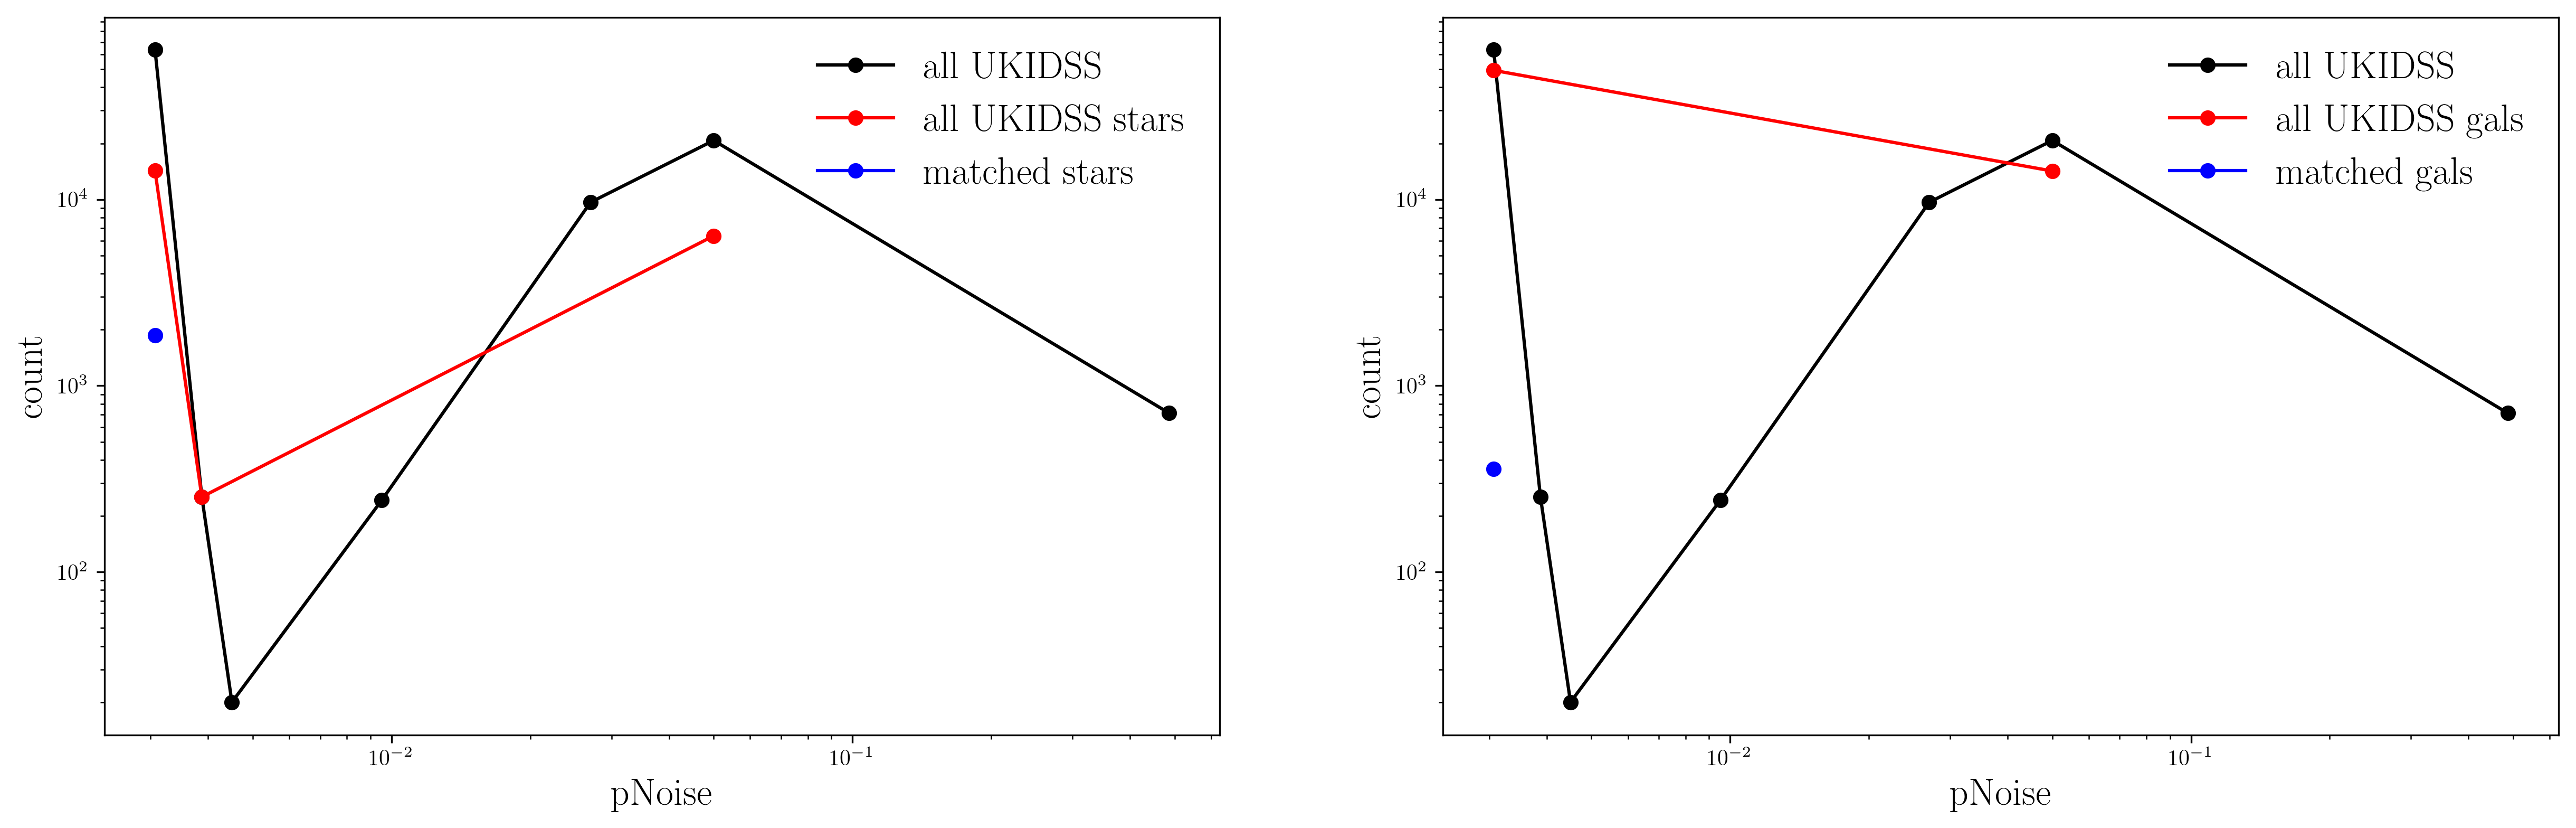

In [17]:
mpl.rcParams['figure.dpi']= 300
fig=plt.figure(figsize=[20,6])
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

mbot=0
mtop=30

pn_arr,count_arr=np.unique(ukdf.pnoise[(ukdf.mAB_j>mbot) & (ukdf.mAB_j<mtop)], return_counts=True)
ax1.plot(pn_arr,count_arr,'ko-',label='all UKIDSS')

pn_arr,count_arr=np.unique(ukdf.pnoise[(ukdf.mergedClass==-1) & (ukdf.mAB_j>mbot) & (ukdf.mAB_j<mtop)],\
                           return_counts=True)
ax1.plot(pn_arr,count_arr,'ro-',label='all UKIDSS stars')

pn_arr,count_arr=np.unique(df.pnoise[(df.mergedClass == -1) & (df.uk_mAB_j>mbot) & (df.uk_mAB_j<mtop)],\
                           return_counts=True)
ax1.plot(pn_arr,count_arr,'bo-',label='matched stars')


ax1.set_xlabel('pNoise',fontsize='xx-large')
ax1.set_ylabel('count',fontsize='xx-large')
ax1.legend(loc=1,frameon=False,fontsize='xx-large')
ax1.set_yscale('log')
ax1.set_xscale('log')


pn_arr,count_arr=np.unique(ukdf.pnoise[(ukdf.mAB_j>mbot) & (ukdf.mAB_j<mtop)], return_counts=True)
ax2.plot(pn_arr,count_arr,'ko-',label='all UKIDSS')

pn_arr,count_arr=np.unique(ukdf.pnoise[(ukdf.mergedClass==1) & (ukdf.mAB_j>mbot) & (ukdf.mAB_j<mtop)],\
                           return_counts=True)
ax2.plot(pn_arr,count_arr,'ro-',label='all UKIDSS gals')

pn_arr,count_arr=np.unique(df.pnoise[(df.mergedClass == 1) & (df.uk_mAB_j>mbot) & (df.uk_mAB_j<mtop)],\
                           return_counts=True)
ax2.plot(pn_arr,count_arr,'bo-',label='matched gals')

ax2.set_xlabel('pNoise',fontsize='xx-large')
ax2.set_ylabel('count',fontsize='xx-large')
ax2.legend(loc=1,frameon=False,fontsize='xx-large')
ax2.set_yscale('log')
ax2.set_xscale('log')

plt.savefig('pn_hist.png',bbox_inches='tight')

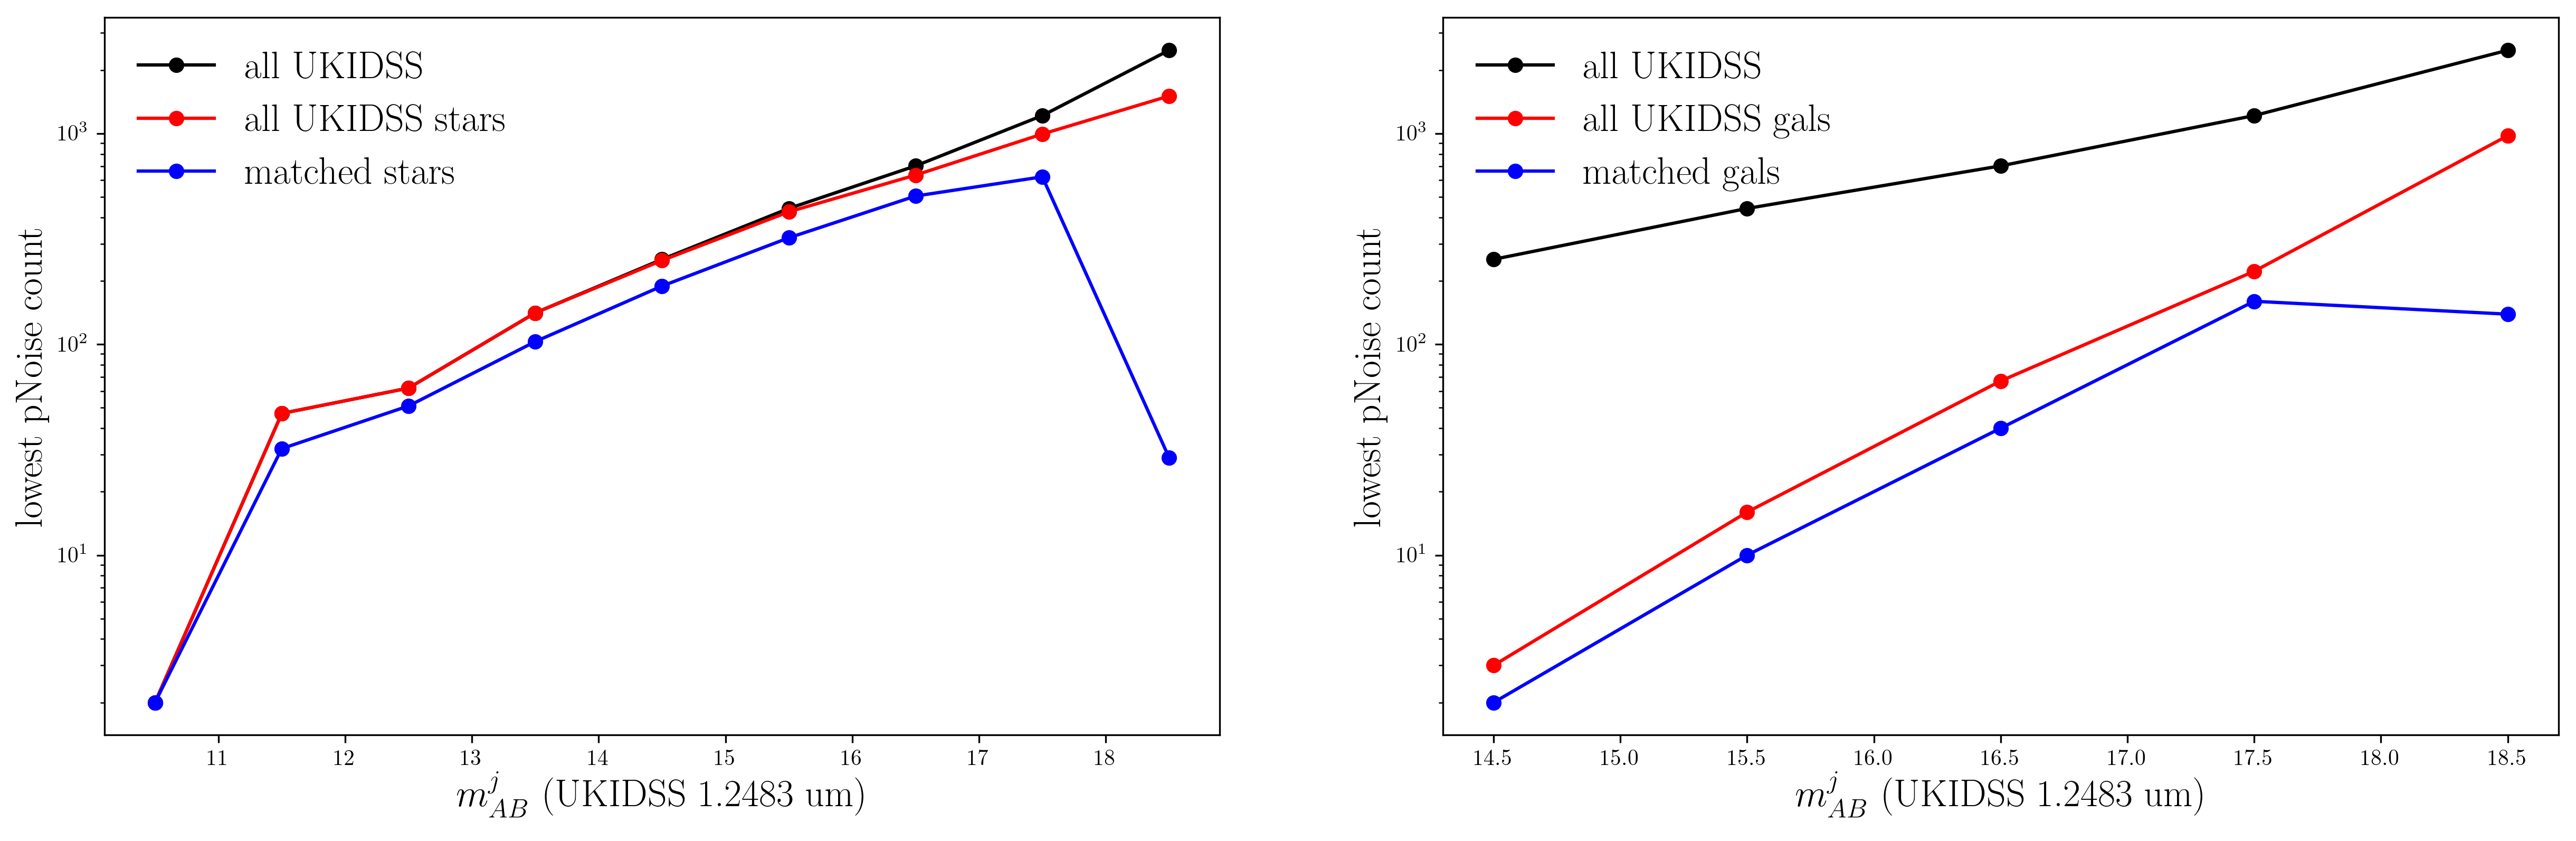

In [18]:
mpl.rcParams['figure.dpi']= 300
fig=plt.figure(figsize=[20,6])
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

mbot_arr=np.arange(10,19,1)
alluk_arr=np.zeros_like(mbot_arr)
alluks_arr=np.zeros_like(mbot_arr)
allmatch_arr=np.zeros_like(mbot_arr)
for im in range(len(mbot_arr)):
    mbot=mbot_arr[im]
    mtop=mbot+1
    _,count_arr=np.unique(ukdf.pnoise[(ukdf.mAB_j>mbot) & (ukdf.mAB_j<mtop)], return_counts=True)
    alluk_arr[im]=count_arr[0]
    _,count_arr=np.unique(ukdf.pnoise[(ukdf.mergedClass==-1) & (ukdf.mAB_j>mbot) & (ukdf.mAB_j<mtop)],\
                           return_counts=True)
    alluks_arr[im]=count_arr[0]
    _,count_arr=np.unique(df.pnoise[(df.mergedClass == -1) & (df.uk_mAB_j>mbot) & (df.uk_mAB_j<mtop)],\
                           return_counts=True)
    allmatch_arr[im]=count_arr[0]
    
    
ax1.plot(mbot_arr+0.5,alluk_arr,'ko-',label='all UKIDSS')
ax1.plot(mbot_arr+0.5,alluks_arr,'ro-',label='all UKIDSS stars')
ax1.plot(mbot_arr+0.5,allmatch_arr,'bo-',label='matched stars')


ax1.set_xlabel(r'$m_{AB}^j$ (UKIDSS 1.2483 um)',fontsize='xx-large')
ax1.set_ylabel('lowest pNoise count',fontsize='xx-large')
ax1.legend(loc=2,frameon=False,fontsize='xx-large')
ax1.set_yscale('log')

mbot_arr=np.arange(14,19,1)
alluk_arr=np.zeros_like(mbot_arr)
alluks_arr=np.zeros_like(mbot_arr)
allmatch_arr=np.zeros_like(mbot_arr)
for im in range(len(mbot_arr)):
    mbot=mbot_arr[im]
    mtop=mbot+1
    _,count_arr=np.unique(ukdf.pnoise[(ukdf.mAB_j>mbot) & (ukdf.mAB_j<mtop)], return_counts=True)
    alluk_arr[im]=count_arr[0]
    _,count_arr=np.unique(ukdf.pnoise[(ukdf.mergedClass==1) & (ukdf.mAB_j>mbot) & (ukdf.mAB_j<mtop)],\
                           return_counts=True)
    alluks_arr[im]=count_arr[0]
    _,count_arr=np.unique(df.pnoise[(df.mergedClass == 1) & (df.uk_mAB_j>mbot) & (df.uk_mAB_j<mtop)],\
                           return_counts=True)
    allmatch_arr[im]=count_arr[0]
    
    
ax2.plot(mbot_arr+0.5,alluk_arr,'ko-',label='all UKIDSS')
ax2.plot(mbot_arr+0.5,alluks_arr,'ro-',label='all UKIDSS gals')
ax2.plot(mbot_arr+0.5,allmatch_arr,'bo-',label='matched gals')


ax2.set_xlabel(r'$m_{AB}^j$ (UKIDSS 1.2483 um)',fontsize='xx-large')
ax2.set_ylabel('lowest pNoise count',fontsize='xx-large')
ax2.legend(loc=2,frameon=False,fontsize='xx-large')
ax2.set_yscale('log')

plt.savefig('pn_mag.png',bbox_inches='tight')

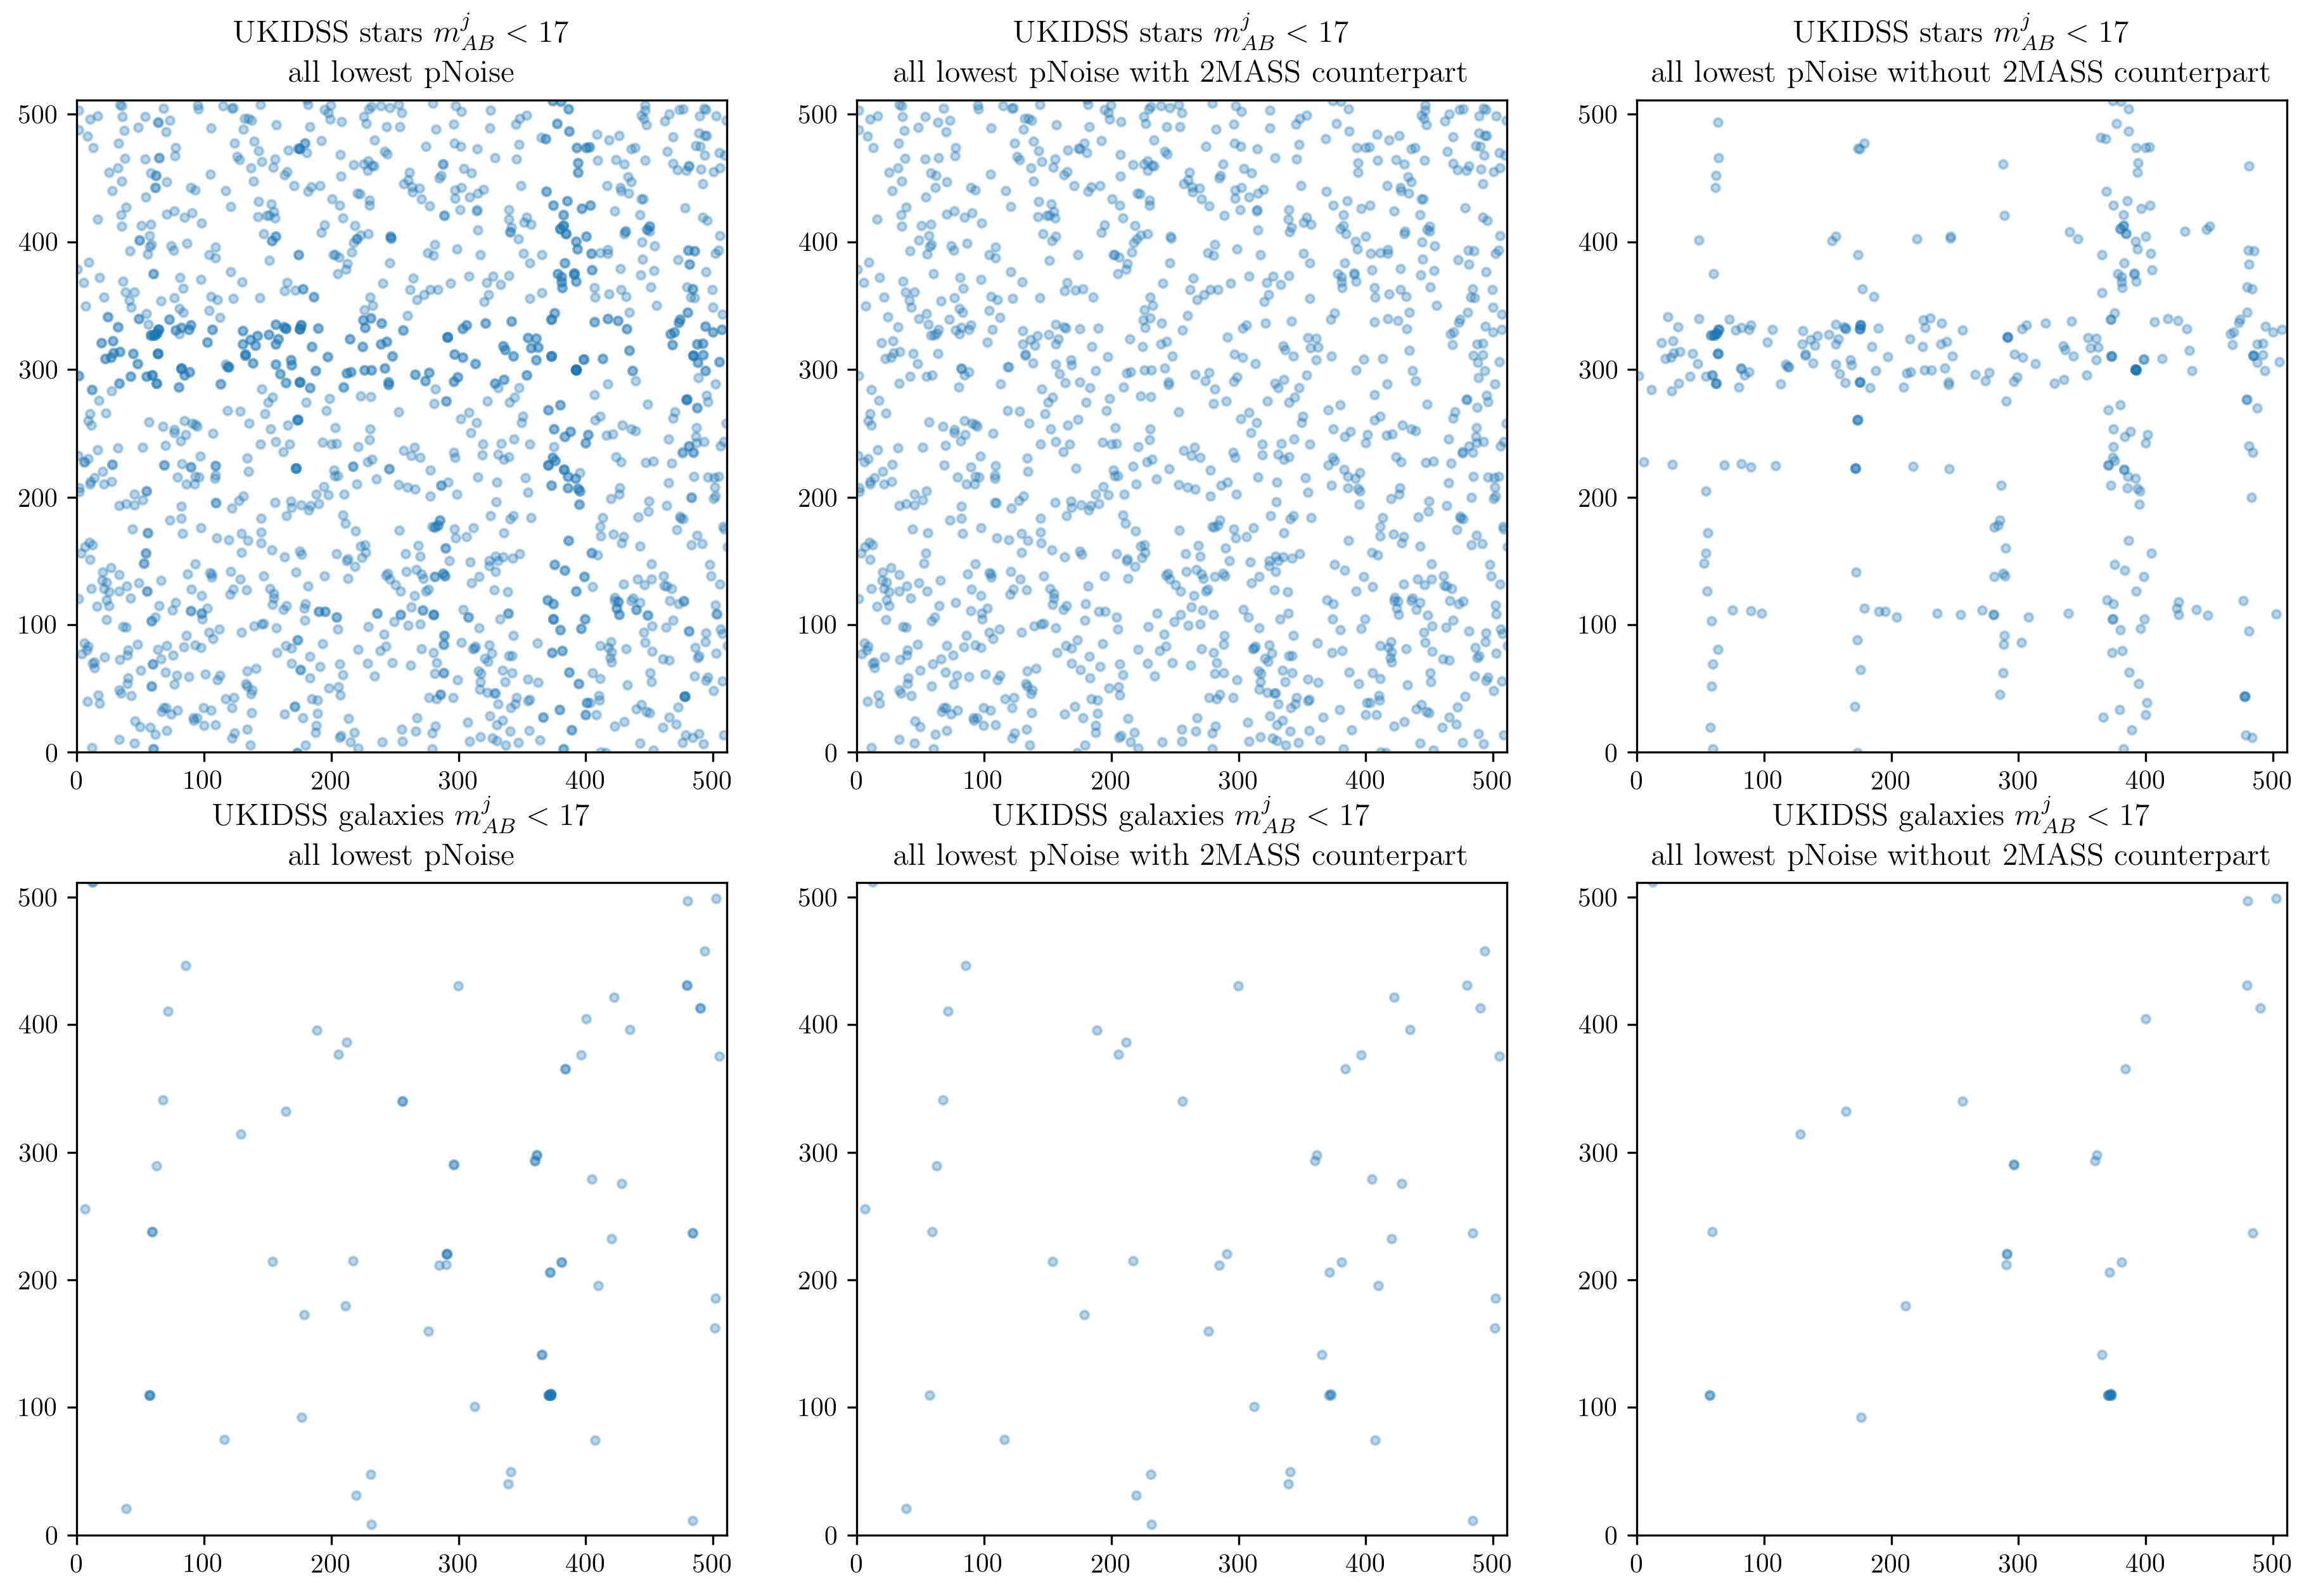

In [19]:
fig=plt.figure(figsize=[15,10])
ax1 = fig.add_subplot(231)
ax2 = fig.add_subplot(232)
ax3 = fig.add_subplot(233)
ax4 = fig.add_subplot(234)
ax5 = fig.add_subplot(235)
ax6 = fig.add_subplot(236)

m_max=17

idx=np.arange(len(ukdf))[(ukdf.mergedClass==-1) & (ukdf.mAB_j<m_max) & (ukdf.pnoise<0.0031)]
ax1.scatter(ukdf.x[idx],ukdf.y[idx],s=10,alpha=0.3)
ax1.set_xlim([0,511])
ax1.set_ylim([0,511])
ax1.set_title('UKIDSS stars $m_{AB}^j<17$ \n all lowest pNoise')

idx=np.arange(len(ukdf))[(ukdf.mergedClass==-1) & (ukdf.mAB_j<m_max) & (ukdf.pnoise<0.0031) & (ukdf.is2m==1)]
ax2.scatter(ukdf.x[idx],ukdf.y[idx],s=10,alpha=0.3)
ax2.set_xlim([0,511])
ax2.set_ylim([0,511])
ax2.set_title('UKIDSS stars $m_{AB}^j<17$  \n all lowest pNoise with 2MASS counterpart')

idx=np.arange(len(ukdf))[(ukdf.mergedClass==-1) & (ukdf.mAB_j<m_max) & (ukdf.pnoise<0.0031) & (ukdf.is2m==0)]
ax3.scatter(ukdf.x[idx],ukdf.y[idx],s=10,alpha=0.3)
ax3.set_xlim([0,511])
ax3.set_ylim([0,511])
ax3.set_title('UKIDSS stars $m_{AB}^j<17$ \n all lowest pNoise without 2MASS counterpart')

idx=np.arange(len(ukdf))[(ukdf.mergedClass==1) & (ukdf.mAB_j<m_max) & (ukdf.pnoise<0.0031)]
ax4.scatter(ukdf.x[idx],ukdf.y[idx],s=10,alpha=0.3)
ax4.set_xlim([0,511])
ax4.set_ylim([0,511])
ax4.set_title('UKIDSS galaxies $m_{AB}^j<17$ \n all lowest pNoise')

idx=np.arange(len(ukdf))[(ukdf.mergedClass==1) & (ukdf.mAB_j<m_max) & (ukdf.pnoise<0.0031) & (ukdf.is2m==1)]
ax5.scatter(ukdf.x[idx],ukdf.y[idx],s=10,alpha=0.3)
ax5.set_xlim([0,511])
ax5.set_ylim([0,511])
ax5.set_title('UKIDSS galaxies $m_{AB}^j<17$  \n all lowest pNoise with 2MASS counterpart')

idx=np.arange(len(ukdf))[(ukdf.mergedClass==1) & (ukdf.mAB_j<m_max) & (ukdf.pnoise<0.0031) & (ukdf.is2m==0)]
ax6.scatter(ukdf.x[idx],ukdf.y[idx],s=10,alpha=0.3)
ax6.set_xlim([0,511])
ax6.set_ylim([0,511])
ax6.set_title('UKIDSS galaxies $m_{AB}^j<17$ \n all lowest pNoise without 2MASS counterpart')

plt.savefig('srcmaps.png',bbox_inches='tight')

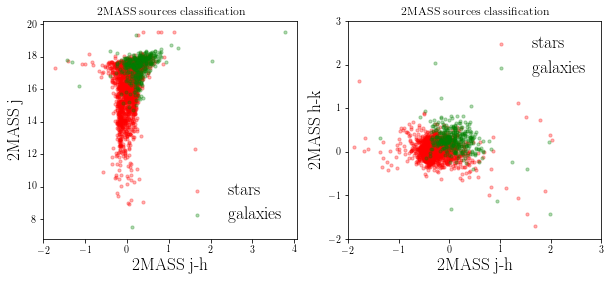

In [22]:
fig=plt.figure(figsize=[10,4])
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

idx=np.arange(len(tmdf))[(tmdf.mergedClass == -1)]
ax1.scatter(tmdf.mAB_j[idx]-tmdf.mAB_h[idx],tmdf.mAB_j[idx],c='r',s=10,alpha=0.3,label='stars')
idx=np.arange(len(tmdf))[(tmdf.mergedClass == 1)]
ax1.scatter(tmdf.mAB_j[idx]-tmdf.mAB_h[idx],tmdf.mAB_j[idx],c='g',s=10,alpha=0.3,label='galaxies')
ax1.set_title('2MASS sources  classification')
ax1.set_xlabel('2MASS j-h',fontsize='xx-large')
ax1.set_ylabel('2MASS j',fontsize='xx-large')
ax1.legend(loc=4,frameon=False,fontsize='xx-large')

idx=np.arange(len(tmdf))[(tmdf.mergedClass == -1)]
ax2.scatter(tmdf.mAB_h[idx]-tmdf.mAB_k[idx],tmdf.mAB_j[idx]-tmdf.mAB_h[idx],c='r',s=10,alpha=0.3,label='stars')
idx=np.arange(len(tmdf))[(tmdf.mergedClass == 1)]
ax2.scatter(tmdf.mAB_h[idx]-tmdf.mAB_k[idx],tmdf.mAB_j[idx]-tmdf.mAB_h[idx],c='g',s=10,alpha=0.3,label='galaxies')
ax2.set_xlim([-2,3])
ax2.set_ylim([-2,3])
ax2.set_title(r'2MASS sources  classification')
ax2.set_xlabel('2MASS j-h',fontsize='xx-large')
ax2.set_ylabel('2MASS h-k',fontsize='xx-large')
ax2.legend(loc=1,frameon=False,fontsize='xx-large')

Text(0.5,0,'2MASS j')

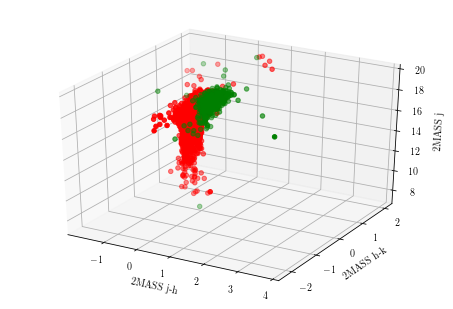

In [23]:
import pylab as p
import mpl_toolkits.mplot3d.axes3d as p3

idx=np.arange(len(tmdf))[(tmdf.mergedClass == -1)]
sj_h=tmdf.mAB_j[idx]-tmdf.mAB_h[idx]
sj=tmdf.mAB_j[idx]
sh_k=tmdf.mAB_h[idx]-tmdf.mAB_k[idx]

idx=np.arange(len(tmdf))[(tmdf.mergedClass == 1)]
gj_h=tmdf.mAB_j[idx]-tmdf.mAB_h[idx]
gj=tmdf.mAB_j[idx]
gh_k=tmdf.mAB_h[idx]-tmdf.mAB_k[idx]

fig=p.figure()
ax = p3.Axes3D(fig)
ax.scatter(sj_h,sh_k,sj, c='r')
ax.scatter(gj_h,gh_k,gj, c='g')
ax.set_xlabel('2MASS j-h')
ax.set_ylabel('2MASS h-k')
ax.set_zlabel('2MASS j')
#ax.view_init(elev=0,azim=360)

In [24]:
ukdf[(ukdf.mergedClass==-1) & (ukdf.mAB_j<17)].describe()

,Unnamed: 0,idx,ra,dec,x,y,mAB_I,mAB_H,mAB_j,mAB_k,mergedClass,pstar,pgalaxy,pnoise,is2m
count,4470.000000,4470.000000,4470.000000,4470.000000,4470.000000,4470.000000,4470.000000,4470.000000,4470.000000,4470.000000,4470.0,4470.000000,4470.000000,4470.000000,4470.000000
mean,82997.936689,134840.910515,243.624464,55.241589,270.325817,278.191775,19.941651,20.080371,5.403377,20.053194,-1.0,0.932842,0.033579,0.033579,0.270917
std,46780.056073,93163.104027,0.480804,0.296893,153.330115,141.474750,3.499145,3.309023,7.377278,3.415896,0.0,0.044772,0.022386,0.022386,0.444483
min,1346.000000,1903.000000,242.825653,54.772221,-0.472664,-0.467015,10.820000,11.463000,0.000000,0.000000,-1.0,0.900000,0.003067,0.003067,0.000000
25%,44130.500000,69346.500000,243.231895,54.988516,132.662608,155.741870,16.319500,16.645750,0.000000,16.645000,-1.0,0.900000,0.003067,0.003067,0.000000
50%,78064.500000,108763.500000,243.545006,55.208935,287.108841,301.659267,22.230500,22.230500,0.000000,22.230500,-1.0,0.900000,0.050000,0.050000,0.000000
75%,125061.250000,213481.250000,244.042122,55.508571,400.718470,393.793124,22.579000,22.579000,14.841750,22.579000,-1.0,0.993865,0.050000,0.050000,1.000000
max,173250.000000,454107.000000,244.582825,55.766560,511.386849,511.482616,23.508000,23.508000,16.999000,23.508000,-1.0,0.993865,0.050000,0.050000,1.000000


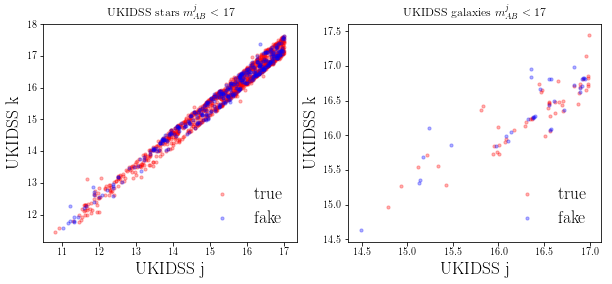

In [27]:
fig=plt.figure(figsize=[10,4])
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

X=ukdf[(ukdf.mergedClass==-1) & (ukdf.mAB_j<17)][['mAB_j','mAB_k','pstar','pgalaxy','pnoise','is2m']]
ax1.scatter(X[X.is2m==1].mAB_j,X[X.is2m==1].mAB_k,c='r',s=10,alpha=0.3,label='true')
ax1.scatter(X[X.is2m==0].mAB_j,X[X.is2m==0].mAB_k,c='b',s=10,alpha=0.3,label='fake')
ax1.set_title('UKIDSS stars $m_{AB}^j< 17$')
ax1.set_xlabel('UKIDSS j',fontsize='xx-large')
ax1.set_ylabel('UKIDSS k',fontsize='xx-large')
ax1.legend(loc=4,frameon=False,fontsize='xx-large')

X=ukdf[(ukdf.mergedClass==1) & (ukdf.mAB_j<17)][['mAB_j','mAB_k','pstar','pgalaxy','pnoise','is2m']]
ax2.scatter(X[X.is2m==1].mAB_j,X[X.is2m==1].mAB_k,c='r',s=10,alpha=0.3,label='true')
ax2.scatter(X[X.is2m==0].mAB_j,X[X.is2m==0].mAB_k,c='b',s=10,alpha=0.3,label='fake')
ax2.set_title('UKIDSS galaxies $m_{AB}^j< 17$')
ax2.set_xlabel('UKIDSS j',fontsize='xx-large')
ax2.set_ylabel('UKIDSS k',fontsize='xx-large')
ax2.legend(loc=4,frameon=False,fontsize='xx-large')